In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
df = pd.read_csv('stud.csv')

In [11]:
df = pd.read_csv('/content/stud.csv')

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [15]:
display(df.isnull().sum())

,0
gender,0
race_ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0


In [16]:

df.drop_duplicates(inplace=True)

In [5]:
display(df.describe())

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Reasoning**:
Visualize the distribution of scores using histograms for 'math_score', 'reading_score', and 'writing_score'.



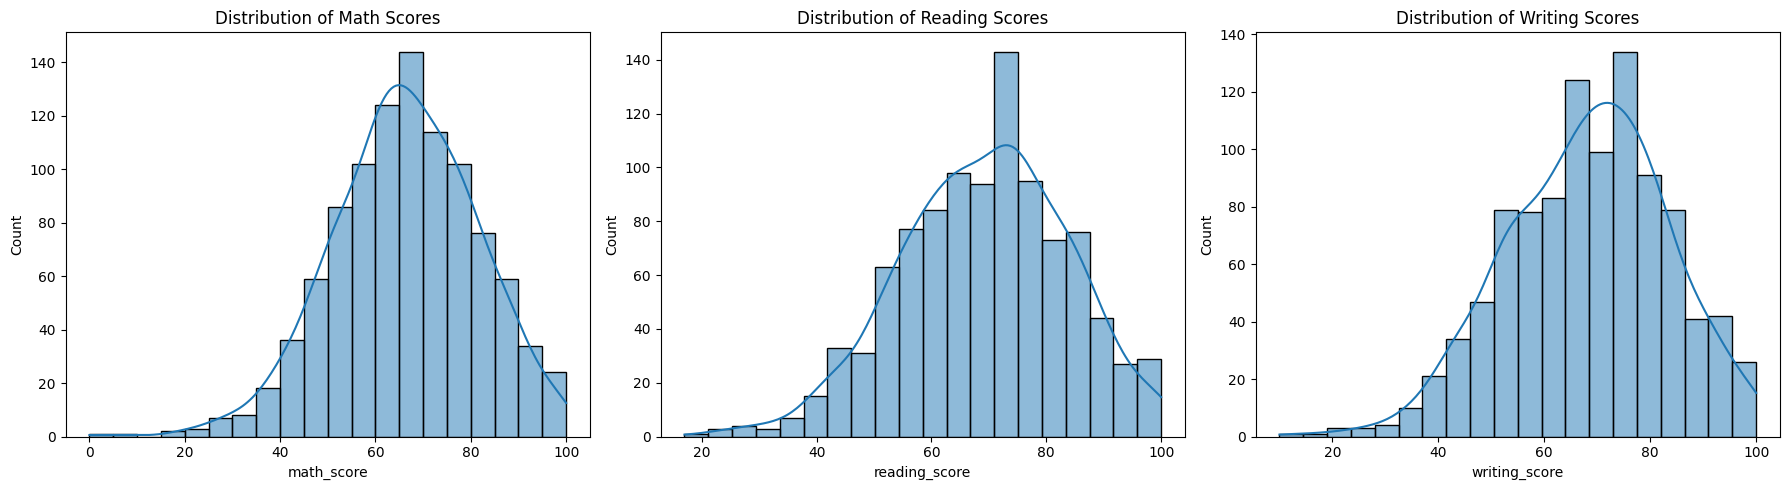

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['math_score'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Math Scores')
sns.histplot(df['reading_score'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Reading Scores')
sns.histplot(df['writing_score'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Distribution of Writing Scores')
plt.tight_layout()
plt.show()

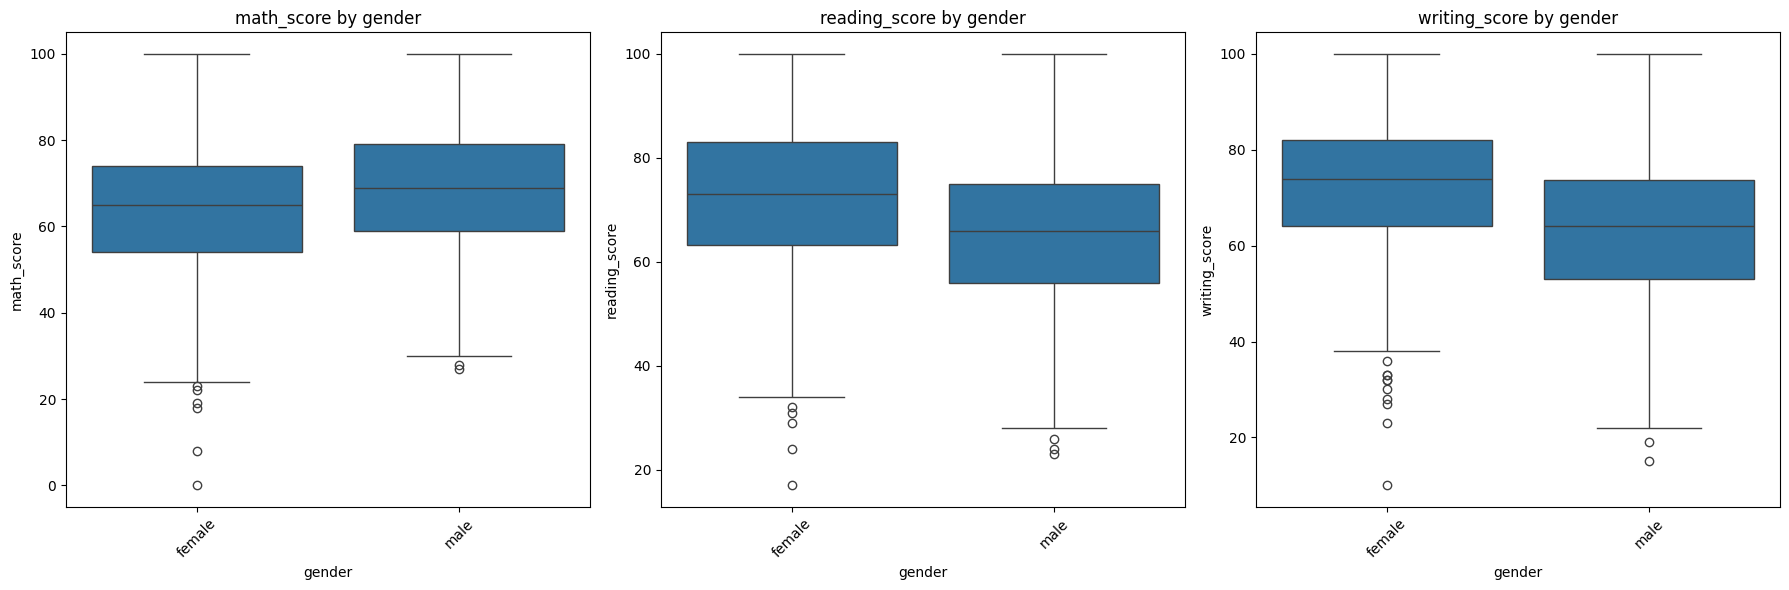

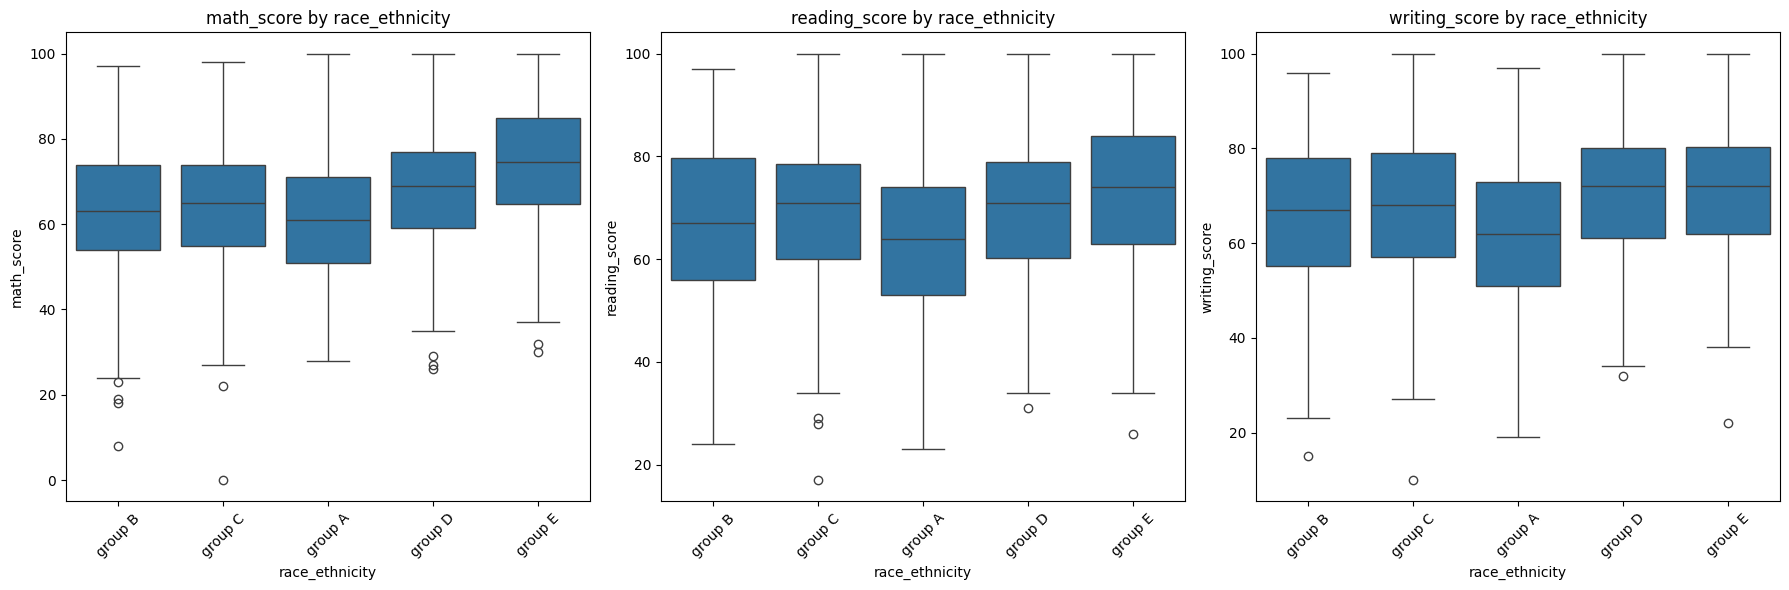

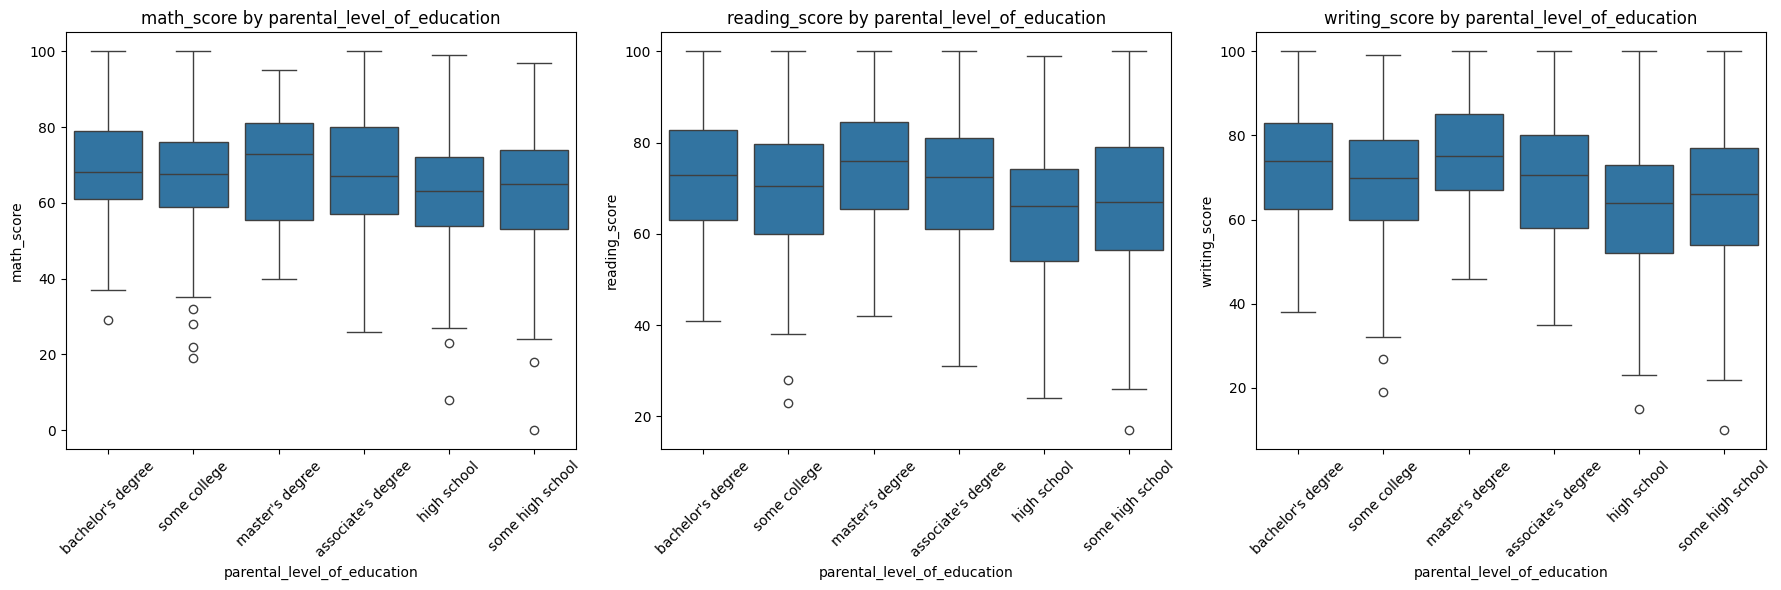

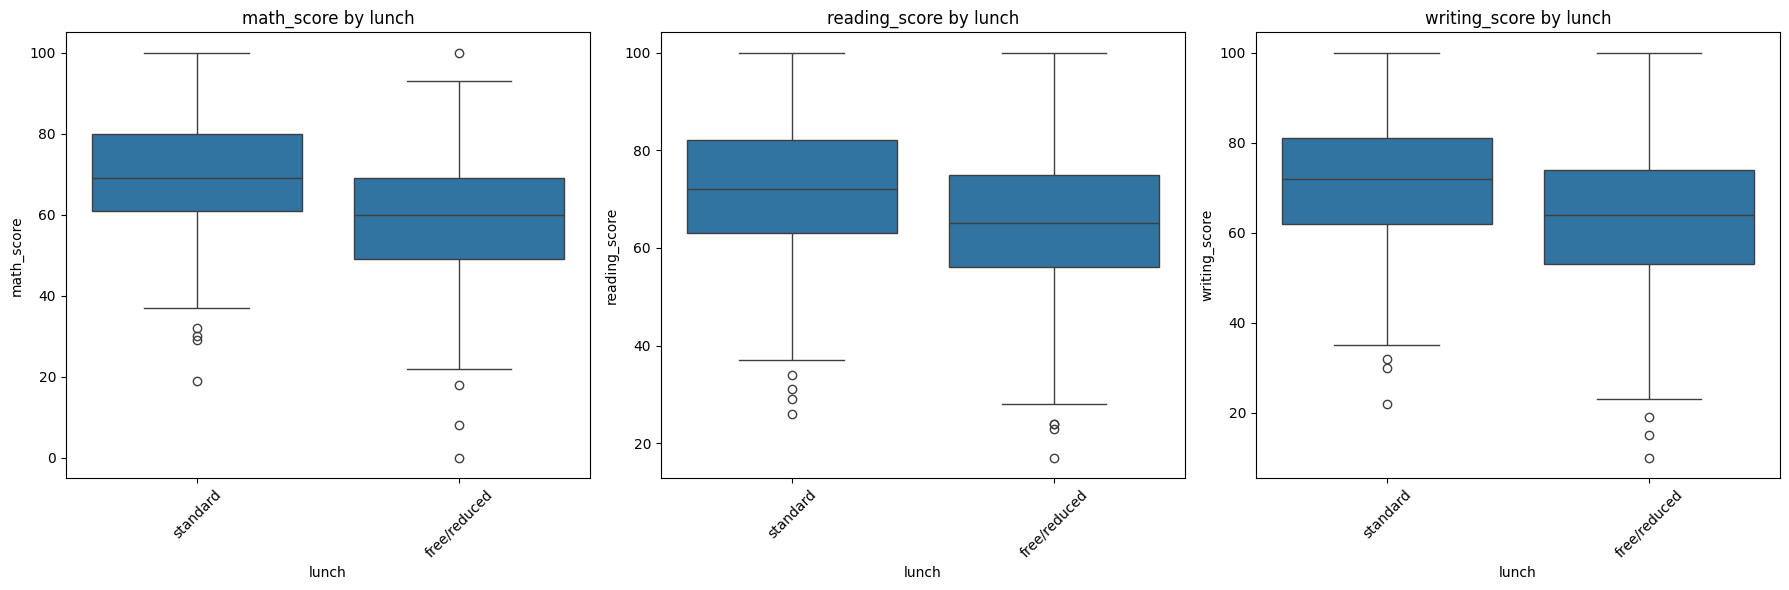

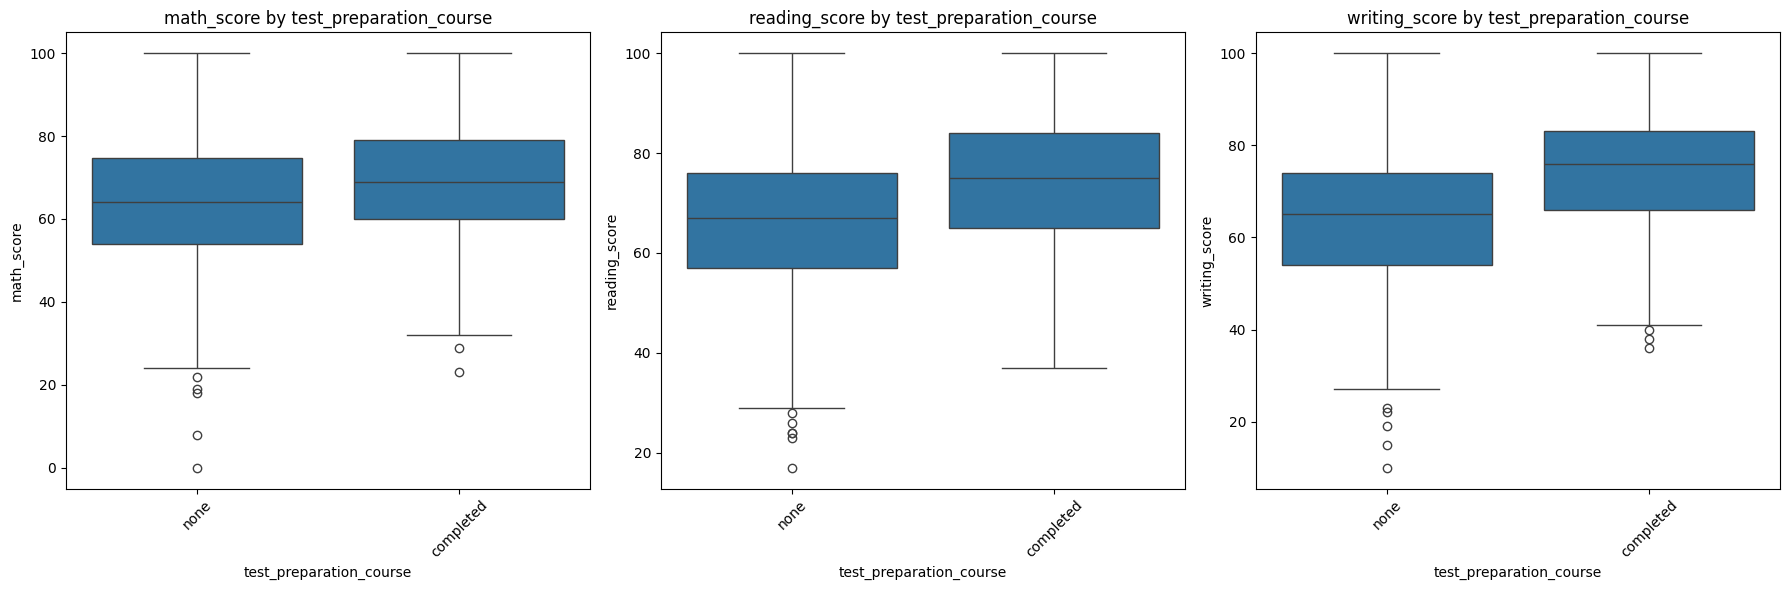

In [7]:
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
score_cols = ['math_score', 'reading_score', 'writing_score']

for col in categorical_cols:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i, score_col in enumerate(score_cols):
        sns.boxplot(x=col, y=score_col, data=df, ax=axes[i])
        axes[i].set_title(f'{score_col} by {col}')
        axes[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

**Reasoning**:
Calculate and display the correlation matrix for the numerical columns.



,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


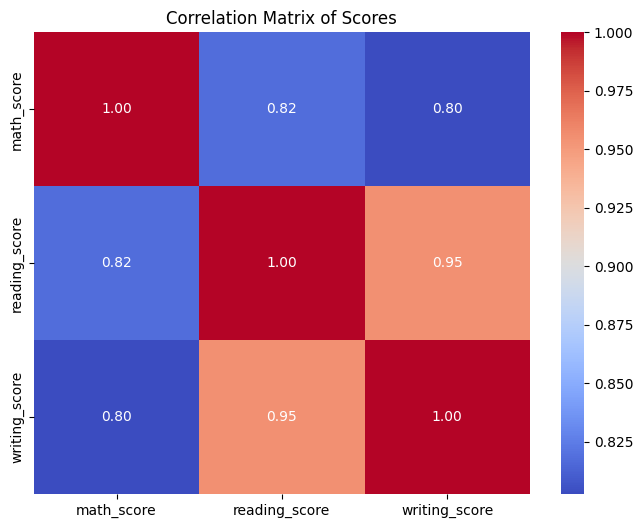

In [8]:
correlation_matrix = df[score_cols].corr()
display(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Scores')
plt.show()

In [9]:


X = df.drop(['math_score', 'reading_score', 'writing_score'], axis=1)
y = df[['math_score', 'reading_score', 'writing_score']]

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 17)
Shape of X_test: (200, 17)
Shape of y_train: (800, 3)
Shape of y_test: (200, 3)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 10.764434830693629
Mean Squared Error (MSE): 189.3928508328888
R-squared (R2): 0.1997106173553144


In [21]:
low_scoring_students = df[(df['math_score'] < 20) | (df['reading_score'] < 20) | (df['writing_score'] < 20)]

print("Students with at least one score less than 20:")
display(low_scoring_students)

Students with at least one score less than 20:


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.000000
59,female,group C,some high school,free/reduced,none,0,17,10,27,9.000000
327,male,group A,some college,free/reduced,none,28,23,19,70,23.333333
596,male,group B,high school,free/reduced,none,30,24,15,69,23.000000
787,female,group B,some college,standard,none,19,38,32,89,29.666667
980,female,group B,high school,free/reduced,none,8,24,23,55,18.333333


In [19]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score'] / 3

print("Total Score and Average Score for each student:")
display(df[['total_score', 'average_score']].head())

Total Score and Average Score for each student:


,total_score,average_score
0,218,72.666667
1,247,82.333333
2,278,92.666667
3,148,49.333333
4,229,76.333333


In [20]:
full_marks_math = df[df['math_score'] == 100].shape[0]
full_marks_reading = df[df['reading_score'] == 100].shape[0]
full_marks_writing = df[df['writing_score'] == 100].shape[0]

print(f"\nNumber of students with full marks in Math: {full_marks_math}")
print(f"Number of students with full marks in Reading: {full_marks_reading}")
print(f"Number of students with full marks in Writing: {full_marks_writing}")


Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
